In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy

## Data Cleaning

#### Import data

In [53]:
data_raw = pd.read_csv('data_raw.csv', sep=';')
data_raw.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### View predictor variables

In [54]:
#check dimensions
data_raw.shape

(4424, 37)

In [55]:
#check variable types
data_raw.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [56]:
#count missing values
data_raw.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nationality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [57]:
#check that each variable has only appropriate values
for var in data_raw.columns:
    print(f'{var}: {data_raw[var].unique()}')


Marital status: [1 2 4 3 5 6]
Application mode: [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Application order: [5 1 2 4 3 6 9 0]
Course: [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Daytime/evening attendance: [1 0]
Previous qualification: [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Previous qualification (grade): [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]
Nationality

## Assess Target Variable

#### View target variable

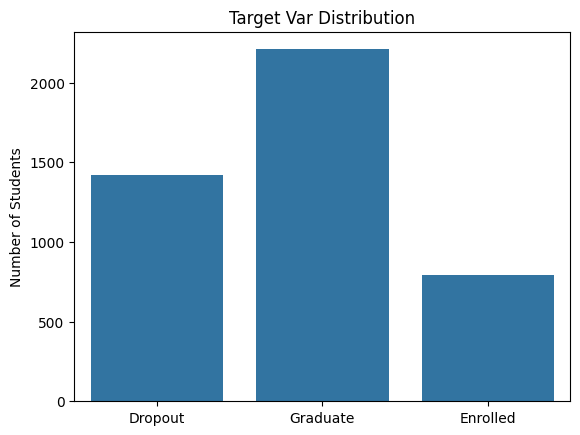

In [58]:
sns.countplot(x=data_raw['Target'], data=data_raw)

plt.title('Target Var Distribution')
plt.xlabel('')
plt.ylabel('Number of Students')
plt.show()

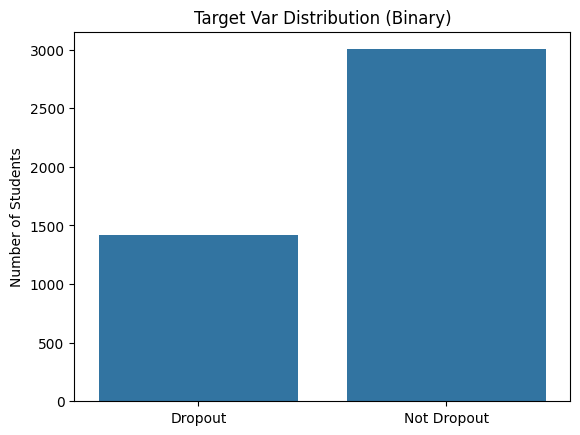

In [59]:
data_binary = copy.deepcopy(data_raw)
data_binary['Target'] = data_binary['Target'].map({'Dropout':'Dropout', 'Graduate':'Not Dropout', 'Enrolled':'Not Dropout'})

sns.countplot(x=data_binary['Target'], data=data_binary)

plt.title('Target Var Distribution (Binary)')
plt.xlabel('')
plt.ylabel('Number of Students')
plt.show()

#### Save dataset with binary target variable

In [60]:
data_binary['Target'] = data_binary['Target'].map({'Dropout':1, 'Not Dropout':0})
data_binary.to_csv('data_clean.csv', index=False)

## Assess Predictor Variables

In [61]:
data = data_binary
X = data.drop('Target', axis=1)
y = data['Target']

#### Plot predictor distributions

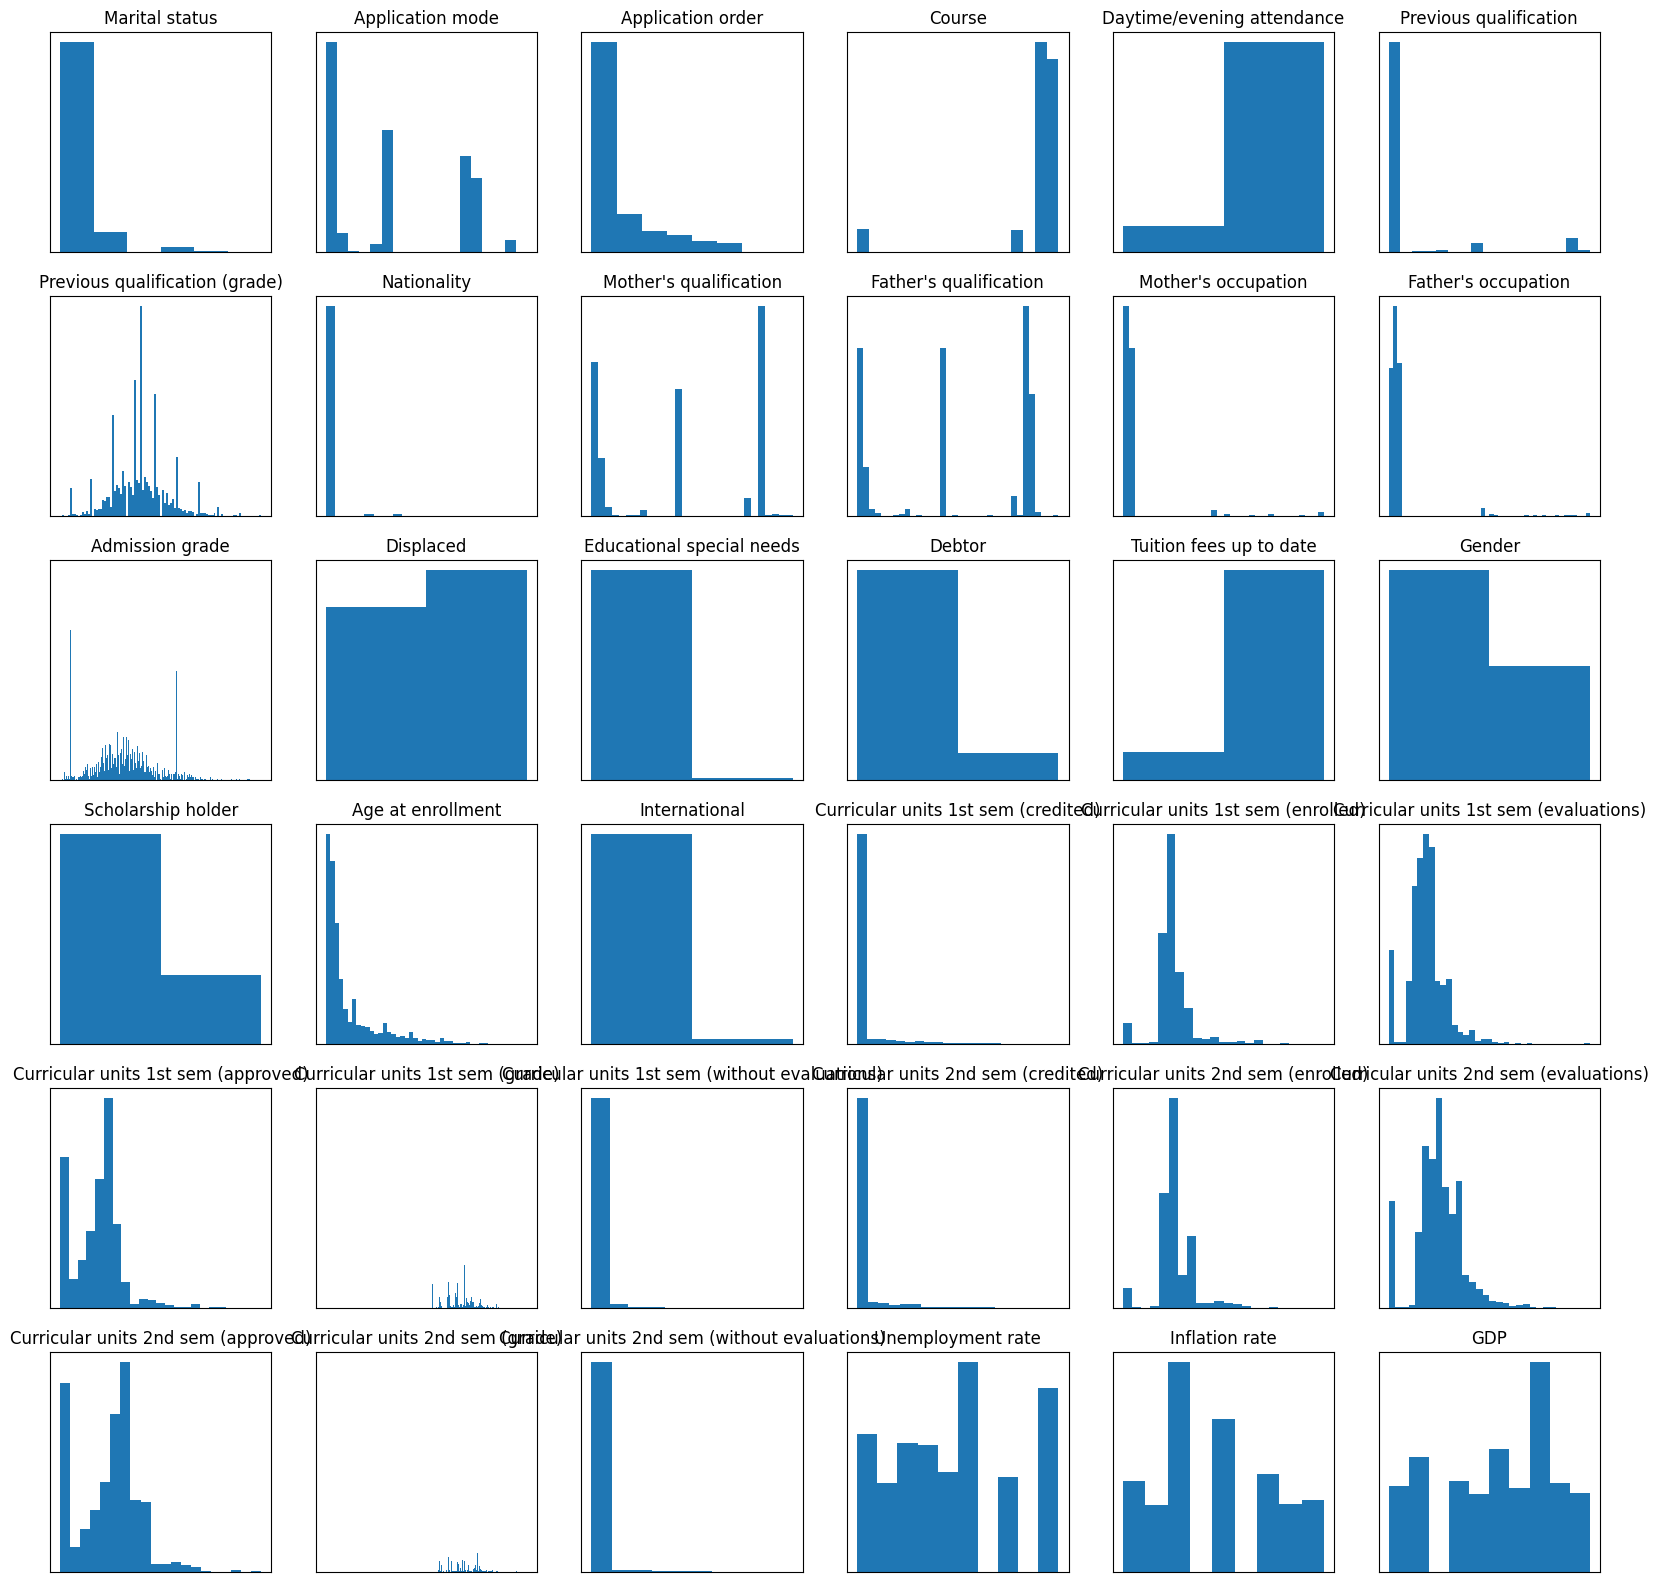

In [62]:
# plot predictor distributions 

fig, axes = plt.subplots(6, 6, figsize=(20, 20)) 

for col, ax in zip(X.columns, axes.flat):
    ax.set_title(col)  
    ax.hist(X[col], bins=len(X[col].unique()))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Some features, like occupation and qualification, are too sparse. Many levels have so few observations that we can't infer anything about their relationships to the target.<br>
It looks like some of these levels were gathered from written-in survey responses and very badly cleaned, because many levels are obviously redundant to others.<br>
Redundant or very similar levels are grouped together, while other very uncommon responses are grouped into an "Other" category.

In [63]:
# Mother's occupation

mapping = {
    1: [9],
    2: [4, 144, 141, 143],
    3: [5, 151, 153],
    4: [3, 132, 134],
    5: [2, 131],
    6: [7, 175, 193, 173, 171],
    7: [0],
    8: [1],
    9: [6, 192],
    10: [8],
    11: [191],
    12: [90, 99, 123, 10, 152, 122, 194, 122, 125]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}

X["Mother\'s occupation"] = X["Mother\'s occupation"].replace(reverse_mapping)

In [64]:
# Father's occupation

mapping = {
    1: [9], 
    2: [7, 171, 172, 174, 175, 193], 
    3: [5, 151, 152, 153, 154], 
    4: [4, 124, 141, 143, 144], 
    5: [3, 132, 134], 
    6: [8, 181, 182, 183], 
    7: [10],
    8: [6, 161, 163, 192], 
    9: [2, 121, 131], 
    10: [1],
    11: [0],
    12: [90, 99, 101, 102, 103, 112, 114, 122, 123, 135, 194, 195]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}

X["Father\'s occupation"] = X["Father\'s occupation"].replace(reverse_mapping)


In [65]:
# Mother's qualification / Father's qualification
# same mapping for both because distributions are very similar, unlike occupation

mapping = {
    1: [1],
    2: [37],
    3: [19, 9, 14, 10],
    4: [38, 11, 30, 26],
    5: [3],
    6: [34, 36, 22, 35, 41, 6, 25, 27, 33, 20, 42, 18, 13, 31],
    7: [2, 40, 29],
    8: [4, 43],
    9: [12],
    10: [5, 44],
    11: [39]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}

X["Father\'s qualification"] = X["Father\'s qualification"].replace(reverse_mapping)
X["Mother\'s qualification"] = X["Mother\'s qualification"].replace(reverse_mapping)

In [66]:
# Nationality

mapping = {
    1: [1],
    2: [41],
    3: [26, 14, 22, 6, 24, 100, 11, 103, 21, 101, 62, 25, 2, 105, 32, 13, 109, 108, 14, 17]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}
X["Nationality"] = X["Nationality"].replace(reverse_mapping)

In [67]:
# Application mode

mapping = {
    0: [10, 2, 57, 56, 27, 26]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}
X["Application mode"] = X["Application mode"].replace(reverse_mapping)

In [68]:
# Previous qualification

mapping = {
    12: [38, 5],
    19: [9, 10, 15, 14],
    4: [43]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}
X['Previous qualification'] = X['Previous qualification'].replace(reverse_mapping)

X.to_csv('X.csv', index=False)

## Outliers

Since our data contains mixed types and features with highly skewed distributions, let's use an isolation forest to detect outliers, as it is model agnostic. 

In [69]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(random_state=1)
iso.fit(X)

X['Anomaly'] = iso.predict(X)
X['Anomaly'].value_counts()

Anomaly
 1    3760
-1     664
Name: count, dtype: int64

The forest with default parameters marked 13% of the dataset as outliers, which is way too much. Let's reduce the contamination parameter.

In [70]:
iso = IsolationForest(random_state=1, contamination=0.01)
iso.fit(X)

X['Anomaly'] = iso.predict(X)
X['Anomaly'].value_counts()

Anomaly
 1    4379
-1      45
Name: count, dtype: int64

For now, we'll leave the outliers in and continue the data exploration. Later, we can use cross validation to choose a value for the contamination parameter. 

In [71]:
X = X.drop('Anomaly', axis=1)

## Linearity

To assess linearity, we can't use scatter plots because the target variable is categorical. Instead, we'll compare the probability plots of each feature with its log transformation, and then create a logit model and check for significance. 

In [72]:
# drop features which are all 0

X = X.drop(['Curricular units 1st sem (credited)', 
            'Curricular units 1st sem (without evaluations)',
            'Curricular units 2nd sem (credited)',
            'Curricular units 2nd sem (without evaluations)'], axis=1)

C:\Users\Melanie\AppData\Local\Temp\ipykernel_7232\4043886594.py:27: RuntimeWarning: invalid value encountered in log
  x_log = np.where(x > 0, np.log(x + 1e-5), 0)
C:\Users\Melanie\AppData\Local\Temp\ipykernel_7232\4043886594.py:27: RuntimeWarning: invalid value encountered in log
  x_log = np.where(x > 0, np.log(x + 1e-5), 0)


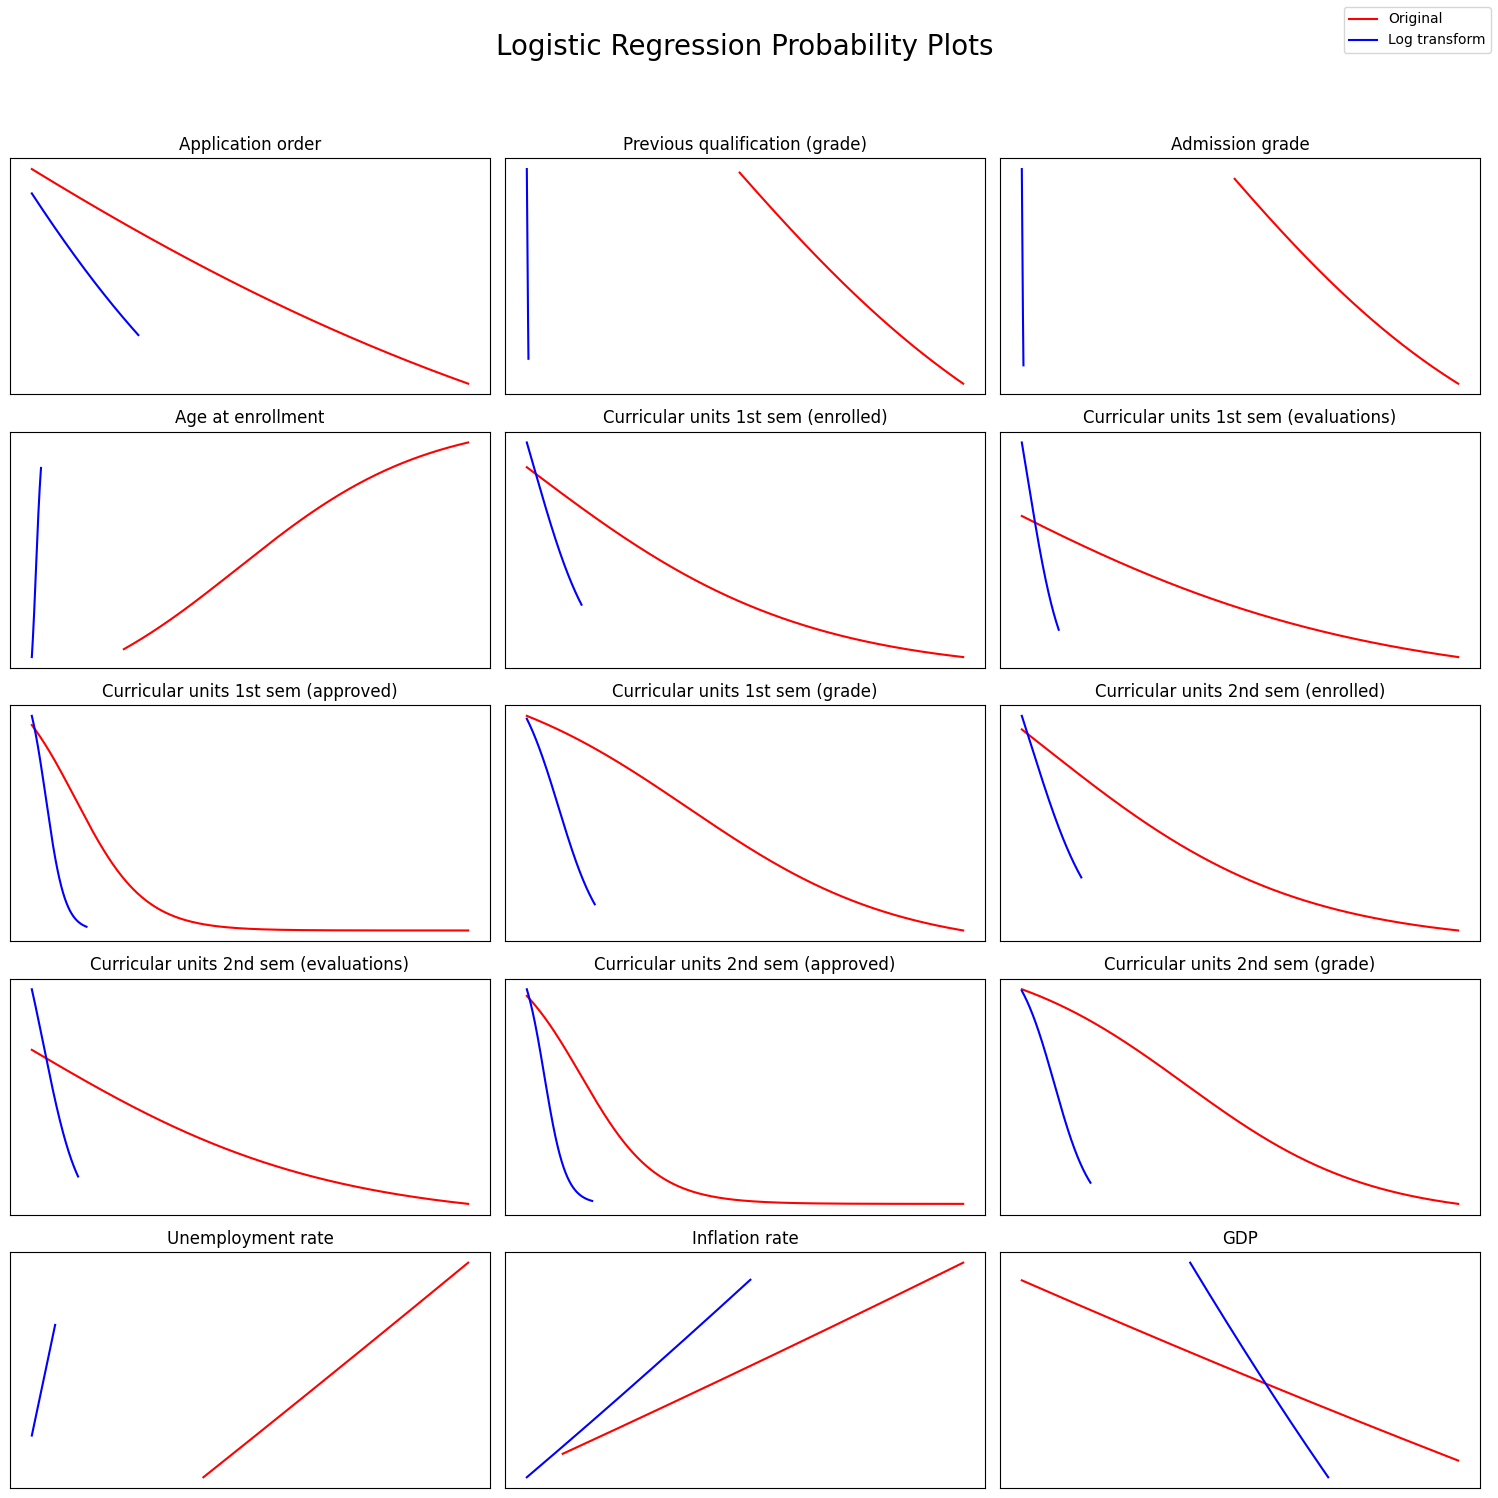

In [73]:
from sklearn.linear_model import LogisticRegression

# Define interval/ratio features
num = ['Application order', 
       'Previous qualification (grade)', 
       'Admission grade',
       'Age at enrollment', 
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Unemployment rate',
       'Inflation rate', 
       'GDP']

model = LogisticRegression()

fig, axes = plt.subplots(5, 3, figsize=(15, 15)) 

for col, ax in zip(num, axes.flat):
    # original feature scale
    x = X[col].to_numpy()
    x_log = np.where(x > 0, np.log(x + 1e-5), 0)

    # log transformed feature
    x = x.reshape(-1, 1)
    x_log = x_log.reshape(-1, 1)

    # get probabilities for original scale
    model.fit(x, y)
    x_range = np.linspace(x.min(), x.max(), 1000)
    y_prob = model.predict_proba(x_range.reshape(-1, 1))[:, 1]

    # get probabilities for log transform
    model.fit(x_log, y)
    x_range_log = np.linspace(x_log.min(), x_log.max(), 1000)
    y_prob_log = model.predict_proba(x_range_log.reshape(-1, 1))[:, 1]

    # plot
    ax.plot(x_range, y_prob, color='red', label='Original')
    ax.plot(x_range_log, y_prob_log, color='blue', label='Log transform')
    ax.set_title(col)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.suptitle('Logistic Regression Probability Plots', fontsize=20)     
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plt.close()


In [74]:
# Box-Tidwell test

import numpy as np
import statsmodels.api as sm

# Define ordinal features, excluding features which are all 0
num = ['Application order', 
       'Previous qualification (grade)', 
       'Admission grade',
       'Age at enrollment', 
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Unemployment rate',
       'Inflation rate', 
       'GDP']

X_log = pd.DataFrame()

# Add new features which are the natural logs of the current features
for col in num:
    X_log['log_' + col] = np.where(X[col] > 0, np.log(X[col] + 1e-5), 0)  # Add a small constant to avoid log(0)

# Add a constant
X_log = sm.add_constant(X_log)

# Fit the model
logit_model = sm.Logit(y, X[num]).fit()
print(logit_model.summary())

logit_log = sm.Logit(y, X_log).fit()
print(logit_log.summary())

Optimization terminated successfully.
         Current function value: 0.359516
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 4424
Model:                          Logit   Df Residuals:                     4409
Method:                           MLE   Df Model:                           14
Date:                Wed, 12 Feb 2025   Pseudo R-squ.:                  0.4273
Time:                        23:13:53   Log-Likelihood:                -1590.5
converged:                       True   LL-Null:                       -2777.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Application order                          0.0199   

c:\Users\Melanie\anaconda3\envs\new_conda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Melanie\anaconda3\envs\new_conda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Based on the plots and the summary statistics, we'll apply logistic transformations to the following:
- Age at enrollment
- Curricular units 1st sem (enrolled)
- Curricular units 1st sem (approved)
- Curricular units 1st sem (grade)
- Curricular units 2nd sem (approved) 

In [75]:
# replace features with transformations

X['Age at enrollment'] = X_log['log_Age at enrollment']
X['Curricular units 1st sem (enrolled)'] = X_log['log_Curricular units 1st sem (enrolled)']
X['Curricular units 1st sem (approved)'] = X_log['log_Curricular units 1st sem (approved)']
X['Curricular units 1st sem (grade)'] = X_log['log_Curricular units 1st sem (grade)']
X['Curricular units 2nd sem (approved)'] = X_log['log_Curricular units 2nd sem (approved)']

X.to_csv('X.csv', index=False)

## Multicolinearity

Let's have a look at multicolinearity. We'll use the results to inform feature selection later.

Since we have a mix of categorical and continuous variables, we can't use the built-in correlation matrix. Instead, we'll have to manually build three of them, each using a different measure of association. One for continous/continuous relationships (spearman correlation), one for categorical/categorical relationships (Cramer's V), and the other for categorical/continous relationships (mutual information).

Mixed data types also means we can't use VIF.

<Axes: >

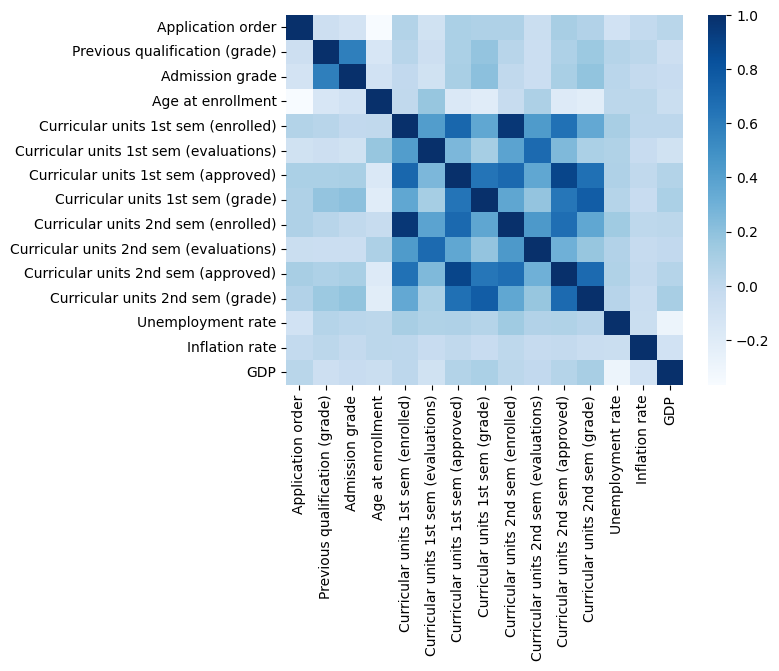

In [25]:
# INTERVAL / RATIO FEATURES

# define non-categorical features
num = ['Application order', 
       'Previous qualification (grade)', 
       'Admission grade',
       'Age at enrollment', 
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Unemployment rate',
       'Inflation rate', 
       'GDP']

# create an association matrix with spearman correlation
matrix = X[num].corr(method='spearman')
sns.heatmap(matrix, cmap='Blues')

The results are predictable. Admission grade and Previous qualification (grade) are highly correlated, and curricular units have high multicollinearity among themselves. The feature set contains a lot of redundancy. 

<Axes: >

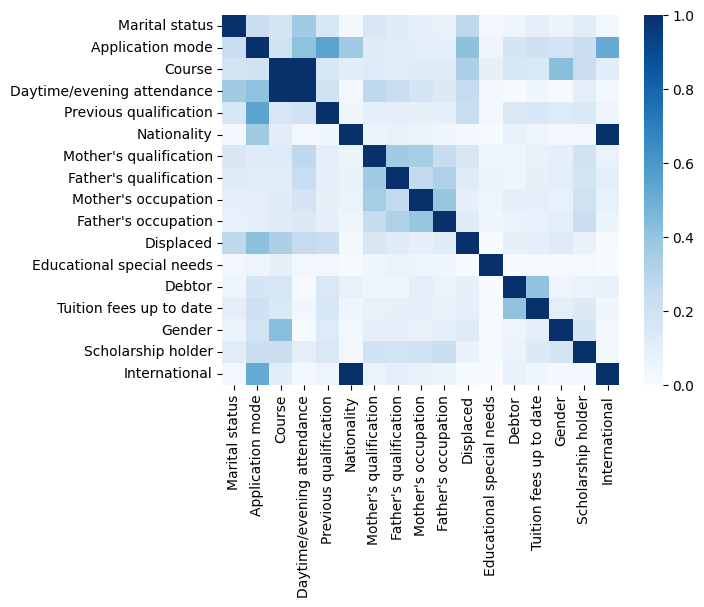

In [ ]:
# CATEGORICAL FEATURES

# create an association matrix with cramer's v
from scipy.stats import chi2_contingency

# define categorical features
cat = ['Marital status', 
       'Application mode', 
       'Course',
       'Daytime/evening attendance', 
       'Previous qualification',
       'Nationality',
       'Mother\'s qualification', 
       'Father\'s qualification',
       'Mother\'s occupation', 
       'Father\'s occupation', 
       'Displaced', 
       'Educational special needs', 
       'Debtor',
       'Tuition fees up to date', 
       'Gender', 
       'Scholarship holder',
       'International']

def cramers_V(x: pd.Series, y: pd.Series)-> float:
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    phi2 = chi2 / n
    r, k = confusion.shape
    return np.sqrt(phi2 / min((k - 1), (r - 1)))

matrix = pd.DataFrame(index=cat, columns=cat)

# get cramer's v for each feature pair
for var1 in cat:
    for var2 in cat:
        if var1 == var2: #var against itself
            matrix.loc[var1, var2] = 1.0  
        else:
            matrix.loc[var1, var2] = cramers_V(X[var1], X[var2])

matrix = matrix.astype('float')
  
sns.heatmap(matrix, cmap='Blues')

Of course, International and Nationality are perfectly associated. Application mode is somewhat associated with them both, as well as Previous qualification. Course and Daytime/evening attendance are nearly perfectly associated as well. There are a few weak associations, particularly among the parental information. This will be sorted out in feature selection later.

<Axes: >

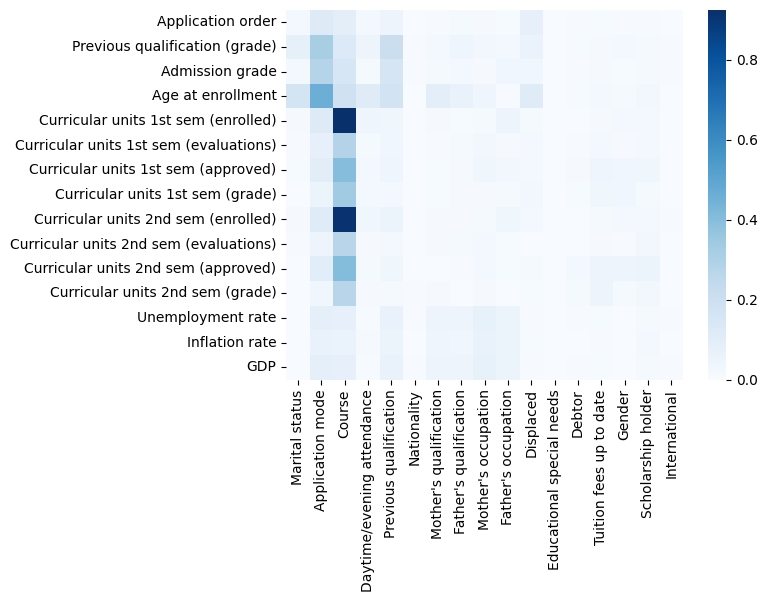

In [28]:
# MIXED TYPES

from sklearn.feature_selection import mutual_info_classif

# create an association matrix with mutual information 
matrix = pd.DataFrame(index=num, columns=cat)

for var1 in num:
    for var2 in cat:
        matrix.loc[var1, var2] = mutual_info_classif(X[var1].to_frame(), X[var2], discrete_features=False, random_state=1)

matrix = matrix.astype('float')
  
sns.heatmap(matrix, cmap='Blues')

Course is highly associated with enrolled units (1st and 2nd sem), and weakly associated with the other features measuring units. Age at enrollment is somewhat associated with application mode. 

In [ ]:
# export X with engineered features

X.to_csv('LogReg/X.csv', index=False)

## Feature Importance

As discovered during EDA, there is high multicolinearity in our feature set. We'll reference the association heatmaps in the EDA notebook. 

To begin, we'll address the redundancy between 'Admission grade' and 'Previous qualification (grade)' by removing whichever one has lower mutual information with the target. 

In [30]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = pd.read_csv('LogReg/X.csv')
y = pd.read_csv('LogReg/y.csv')

y_np = y.to_numpy()
y_np = y_np.ravel()

ag = mutual_info_classif(X['Admission grade'].to_frame(), y_np, discrete_features=False, random_state=1)
pqg = mutual_info_classif(X['Previous qualification (grade)'].to_frame(), y_np, discrete_features=False, random_state=1)

print(f'Admission grade: {ag}\nPrevious qualification (grade): {pqg}')

Admission grade: [0.02852458]
Previous qualification (grade): [0.0357418]


We'll remove 'Admission grade'.

We'll also remove 'International' because it's completely redundant with 'Nationality' but provides less information.

Next, we'll address the fact that 'Course' and 'Daytime/evening attendance' are one for one associated. We'll remove 'Daytime/evening attendance' because it's redundant with 'Course', which contains more information.

Curricular units (enrolled), for both 1st and 2nd semesters, are highly associated with 'Course'. However, we should be careful about removing either since they provide very different types of information. Let's compare their relatinships to the target using mutual information. We can't compare VIF scores since one feature is categorical. 

In [31]:
# COMPARE MUTUAL INFORMATION
c = mutual_info_classif(X['Course'].to_frame(), y_np, discrete_features=True, random_state=1)
cu = mutual_info_classif(X['Curricular units 1st sem (enrolled)'].to_frame(), y_np, discrete_features=False, random_state=1)

print(f'Course: {c}\nCurricular units 1st sem (enrolled): {cu}')

Course: [0.03455513]
Curricular units 1st sem (enrolled): [0.02378636]


In [32]:
# REMOVE REDUNDANT FEATURES

X = X.drop(['Admission grade', 'Daytime/evening attendance', 'International'], axis=1)

It's still not clear if it's suitable to remove one or the other. Let's keep both for now and choose one based on model performance later.

Now we need to address the high multicolinearity among all the features measuring curricular units. Let's try using PCA.<br>
First, we'll try PCA using all the features. This probably won't yield good results as most of the features aren't correlated amongst each other. Then, we'll try using subset PCA, wherein only the curricular unit features are transformed and the other features are left unchanged.

In [33]:
from sklearn.decomposition import PCA

curr_units = [
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)'
]

# ALL FEATURES
pca_all = PCA(n_components=3)
pca_all.fit(X)

# CURR UNITS FEATURES
pca_cu = PCA(n_components=3)
pca_cu.fit(X[curr_units])

print(f'All features:\n{pca_all.explained_variance_ratio_}\n\nCurr Units features:\n{pca_cu.explained_variance_ratio_}')

All features:
[9.99840289e-01 7.80459674e-05 4.11694210e-05]

Curr Units features:
[0.64980168 0.25016538 0.05229662]


The components of pca_all explain almost no variance, whereas the first two components of pca_cu explain 90% of it. We'll replace all the curricular unit features with these two components. This also resolves the 'Curricular units (enrolled)' vs 'Course' issue.

In [34]:
# REPLACE CURR UNITS FEATURES WITH PRINCIPLE COMPONENTS

pca_cu = PCA(n_components=2)
transformed = pca_cu.fit_transform(X[curr_units])

pca_df = pd.DataFrame(transformed, columns=[f'Curr units PC{i+1}' for i in range(transformed.shape[1])])
X = X.drop(curr_units, axis=1)
X = pd.concat([X, pca_df], axis=1)

In [35]:
X.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nationality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Curr units PC1',
       'Curr units PC2'],
      dtype='object')

### Model 1

Now we'll fit a logit model with the current feature subset and look at the summary statistics for further selection.

First, we need to define a couple of functions to scale and encode our data. This is because of our mixed data types (we don't want to scale the categorical features, and we don't want to one-hot encode the continous ones). The sklearn scalers and encoders have no built in way of handling this, so we need to add it.

In [36]:
''' 
Function to scale data without altering nominal features.
Takes 'df' (a dataframe) and 'nominal' (a list of nominal feature names).
Returns the transformed dataframe. 
'''

from sklearn.preprocessing import MinMaxScaler

def scale(df: pd.DataFrame, nominal: list)->pd.DataFrame:

    scaler = MinMaxScaler()

    for var in df.columns:
            
        if var not in nominal:
            raw = df[var].to_numpy()
            raw = raw.reshape(-1, 1)

            scaler.fit(raw)
            scaled = scaler.transform(raw)
            df[var] = scaled

    return df

In [37]:
''' 
Function to one-hot encode data without altering non-nominal features.
Takes 'df' (a dataframe) and 'nominal' (a list of nominal feature names).
Returns the transformed dataframe.
'''

from sklearn.preprocessing import OneHotEncoder

def one_hot(df: pd.DataFrame, nominal: list)->pd.DataFrame:

    # initialize encoder object
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', drop='first')

    # subset data
    df = df[nominal]

    # fit
    fit = encoder.fit(df)
    
    # transform
    encoded = encoder.transform(df)

    # convert result to df
    one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(nominal))

    # add results to full data
    data_one_hot = pd.concat([df.reset_index(drop=True), 
                              one_hot_df.reset_index(drop=True)], 
                              axis=1)

    # drop original nominal columns
    data_one_hot = data_one_hot.drop(nominal, axis=1)

    return data_one_hot

In [77]:
# define categorical features
cat = ['Marital status', 
       'Application mode', 
       'Course',
       'Previous qualification', 
       'Nationality', 
       'Mother\'s qualification', 
       'Father\'s qualification',
       'Mother\'s occupation', 
       'Father\'s occupation', 
       'Displaced',
       'Educational special needs', 
       'Debtor', 
       'Tuition fees up to date',
       'Gender', 
       'Scholarship holder']

# scale data
X_scaled = scale(X, cat)

# one-hot encode data
X_encoded = one_hot(X_scaled, cat)

Now we'll fit the model.

In [ ]:
import statsmodels.api as sm

# one-hot encoding

# add intercept
X_logit = sm.add_constant(X_encoded)

# fit
clf = sm.Logit(y, X_logit)
clf_fit = clf.fit()

# summary stats
print(clf_fit.summary())

         Current function value: 0.442863
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 4424
Model:                          Logit   Df Residuals:                     4330
Method:                           MLE   Df Model:                           93
Date:                Wed, 12 Feb 2025   Pseudo R-squ.:                  0.2945
Time:                        23:31:14   Log-Likelihood:                -1959.2
converged:                      False   LL-Null:                       -2777.3
Covariance Type:            nonrobust   LLR p-value:                2.383e-280
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.4468      1.046      2.340      0.019       0.398       4.496
Marital status

c:\Users\Melanie\anaconda3\envs\new_conda\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
c:\Users\Melanie\anaconda3\envs\new_conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Melanie\anaconda3\envs\new_conda\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


In [83]:
# convert features summary table to dataframe
fit_df = (clf_fit.summary2().tables[1])

#convert feature names from row index labels to column
fit_df = fit_df.reset_index()
fit_df = fit_df.rename(columns={'index': 'Var'})
fit_df

,Var,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
0,const,2.446841,1.045558,2.340226,1.927210e-02,0.397586,4.496097
1,Marital status_2,-0.427304,0.160135,-2.668407,7.621191e-03,-0.741163,-0.113446
2,Marital status_3,-0.217865,1.272242,-0.171245,8.640312e-01,-2.711413,2.275683
3,Marital status_4,-0.181149,0.279263,-0.648667,5.165536e-01,-0.728495,0.366197
4,Marital status_5,-1.042737,0.550055,-1.895696,5.800020e-02,-2.120824,0.035351
...,...,...,...,...,...,...,...
89,Educational special needs_1,0.507007,0.347104,1.460678,1.441037e-01,-0.173304,1.187319
90,Debtor_1,0.612277,0.138178,4.431071,9.376615e-06,0.341453,0.883101
91,Tuition fees up to date_1,-2.712807,0.157745,-17.197445,2.775003e-66,-3.021981,-2.403633
92,Gender_1,0.606602,0.091609,6.621652,3.552057e-11,0.427052,0.786151


In [84]:
not_sig = fit_df[fit_df['P>|z|'] > 0.05]['Var'].tolist()

print('Features with non-significant coefficients:\n')
print(not_sig)

Features with non-significant coefficients:

['Marital status_3', 'Marital status_4', 'Marital status_5', 'Marital status_6', 'Application mode_1', 'Application mode_5', 'Application mode_7', 'Application mode_16', 'Application mode_17', 'Application mode_18', 'Application mode_39', 'Application mode_42', 'Application mode_43', 'Application mode_44', 'Application mode_51', 'Application mode_53', 'Course_171', 'Course_9003', 'Course_9070', 'Course_9085', 'Course_9119', 'Course_9130', 'Course_9147', 'Course_9238', 'Course_9254', 'Course_9500', 'Course_9556', 'Course_9670', 'Course_9773', 'Course_9853', 'Course_9991', 'Previous qualification_3', 'Previous qualification_4', 'Previous qualification_6', 'Previous qualification_12', 'Previous qualification_39', 'Previous qualification_40', 'Previous qualification_42', 'Nationality_2', 'Nationality_3', "Mother's qualification_2", "Mother's qualification_3", "Mother's qualification_4", "Mother's qualification_5", "Mother's qualification_6", "Mo

### Model 2

In [41]:
# remove non-significant features and repeat the modeling

# remove features
X = X.drop(not_sig, axis=1)

# fit
clf = sm.Logit(y, X)
clf_fit = clf.fit()

# convert features summary table to dataframe
fit_df = (clf_fit.summary2().tables[1])

#convert feature names from row index labels to column
fit_df = fit_df.reset_index()
fit_df = fit_df.rename(columns={'index': 'Var'})

not_sig = fit_df[fit_df['P>|z|'] > 0.05]['Var'].tolist()

print('Features with non-significant coefficients:\n')
print(not_sig)

Optimization terminated successfully.
         Current function value: 0.363400
         Iterations 7
Features with non-significant coefficients:

[]


All features now have a statistically significant relationship to the target. Let's plot their coefficients. 

C:\Users\Melanie\AppData\Local\Temp\ipykernel_7232\2860720309.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


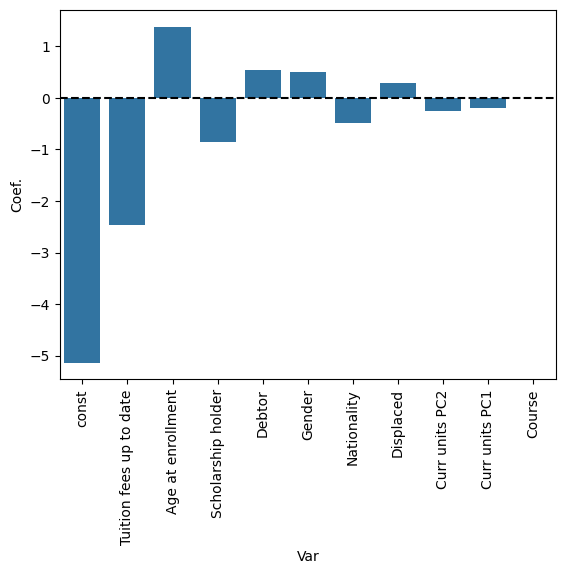

In [42]:
import seaborn as sns

# sort dataframe
fit_df = fit_df.sort_values(by='Coef.', ascending=False, key=abs)

# plot coefficients
g = sns.barplot(data=fit_df, x='Var', y='Coef.')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.axhline(y=0, color='black', linestyle='--')


The constant coefficient is HUGE. This means our predictive model is going to predict false negatives far more often than false positives, which is not what we want. We'll probably have to tune the decision threshold to deal with this.

The most important features are:
1. Tuition fees up to date
2. Age at enrollment
3. Scholarship holder
4. Debtor
5. Nationality
6. Displaced
7. Curr units PC2
8. Curr units PC1

Even though some of these features have small coefficients, that doesn't mean they aren't useful in a predictive model. Even including the non-significant features may improve the model's metrics. This analysis is meant to help us understand which factors are important to examine in the student population. <br>

Given that female is encoded as 0 and male is 1, males are more likely to dropout. This may be because males often aspire for the trades and the military, whereas females have few obvious pathways outside of education that aren't male dominated. This means that preventing male students from dropping out may be a matter of career counseling more so than academic counseling, but more investigation is needed to determine that.<br>
Older individuals are also more likely to dropout. 

### Conclusion 

Tuition fees up to date:<br>
Predictably, those struggling to pay tuition are likely to dropout. This is the single most important factor. 

Age at enrollment:<br>
Older individuals are more likely to dropout.

Scholarship holder:<br>
Students with scholarships are less likely to dropout.

Debtor:<br>
Once again, those with financial struggles are more likely to dropout.

Gender:<br>
Males are more likely to dropout. This may be because males often aspire for the trades and the military, whereas females have few obvious pathways outside of education that aren't male dominated. This means that preventing male students from dropping out may be a matter of career counseling, but more investigation is needed to determine that.

Nationality:<br>
International students are less likely to dropout.

Displaced:<br>
Displaced students are more likely to dropout, though not as much as I'd expect.

Curricular units:<br>
Those with fewer curricular units are more likely to dropout, but not by a lot.

Course:<br>
While course does have an impact on a student's chance of dropping out, it's very small. Course should not be a matter of concern. 